In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import sys
import os
import pandas as pd

In [45]:
# Download latest version
stock_data = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "camnugent/sandp500",
    "all_stocks_5yr.csv",
)

# download company info
comp_info = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "paytonfisher/sp-500-companies-with-financial-information",
    "financials.csv",
)


In [50]:
# Let's see if there is any company left out from the main stocks dataset
left = stock_data["Name"].drop_duplicates()
right = comp_info

res = pd.merge(left, right, how='left', left_on='Name', right_on='Symbol')
missing_count = len(res[res["Sector"].isna()])

print(f"Out of {len(res)} companies, {missing_count} are missing in the info dataset.")

Out of 505 companies, 0 are missing in the info dataset.


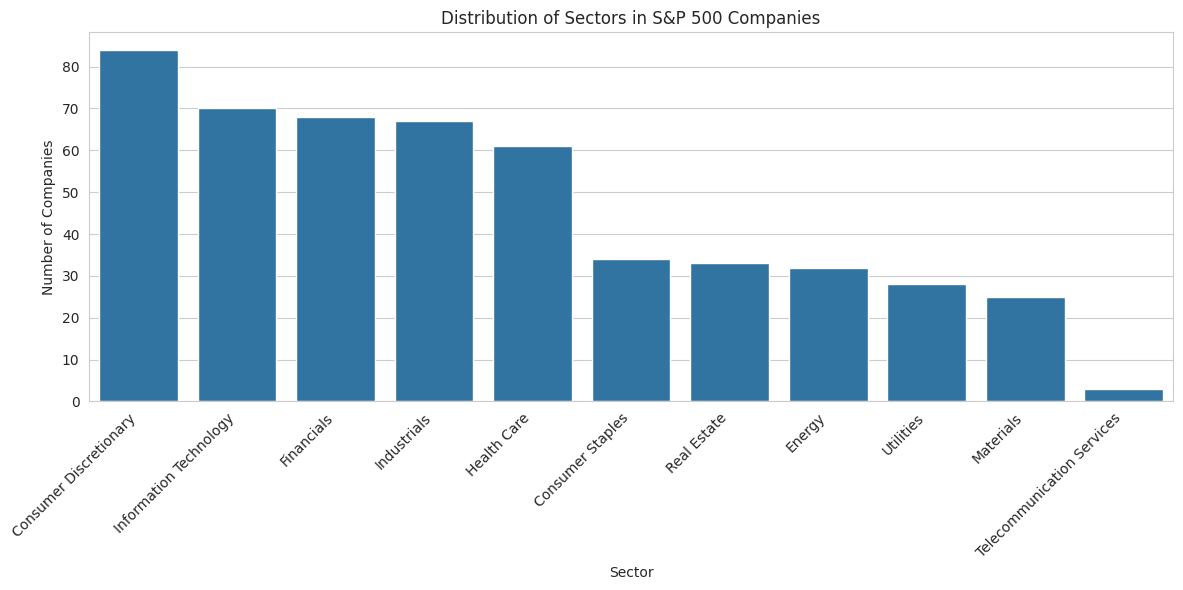

In [46]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import seaborn for enhanced visualizations (optional but recommended)
import seaborn as sns

# Set a style for the plots (optional)
sns.set_style("whitegrid")

# Calculate the value counts for the 'Sector' column
sector_counts = comp_info['Sector'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.barplot(x=sector_counts.index, y=sector_counts.values)

# Add titles and labels
plt.title('Distribution of Sectors in S&P 500 Companies')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()